# Assignment 1

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [2]:
def my_function(a, b=1, *args, c="default", **kwargs):
    return a, b, args, c, kwargs

## Exercise 1


In [3]:
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [4]:
import inspect

def inspect_function(func):
    sig = inspect.signature(func)
    print("Function name:", func.__name__)
    for param in sig.parameters.values():
        print(f"Argument: {param.name}, kind: {param.kind}, default: {param.default}")

## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message. 

In [8]:
from datetime import datetime
from time import sleep
 
# wrong function
def my_time_now(msg, *, dt=datetime.now()):
    dt = datetime.now()
    print(msg, dt)
 


In [9]:
# simple tests :)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')

The time is now:  2024-12-18 17:27:17.647726
The time is now:  2024-12-18 17:27:18.648122
The time is now:  2024-12-18 17:27:19.648591


## Exercise 4

In [10]:
def limit(input_generator, max_count):
    count = 0
    for val in input_generator:
        if count >= max_count:
            break
        yield val
        count += 1

## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task)

In [13]:
def pascal_triangle():
    row = [1]
    while True:
        for x in row:
            yield x
        row = [1] + [row[i] + row[i+1] for i in range(len(row)-1)] + [1]

In [15]:
for x in limit(pascal_triangle(), 15):
    print(x, end=' ')

1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 

## Exercise 6


In [16]:
import pathlib  # can change to os module if you want
import sys

def files_sorted_by_size(path_to_dir):
    p = pathlib.Path(path_to_dir)
    files = [f for f in p.iterdir() if f.is_file()]
    files.sort(key=lambda x: (x.stat().st_size, x.name))
    return files

## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [17]:
import heapq

def merge_sorter(*args):
    for val in heapq.merge(*args):
        yield val

## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [19]:
import time

def profiler():
    def decorator(func):
        func.last_time_taken = 0
        func.calls = 0
        call_depth = 0

        def wrapper(*args, **kwargs):
            nonlocal call_depth
            start = None
            if call_depth == 0:
                func.calls = 0
                start = time.time()

            call_depth += 1
            func.calls += 1
            result = func(*args, **kwargs)
            call_depth -= 1

            if call_depth == 0 and start is not None:
                end = time.time()
                func.last_time_taken = end - start
            return result

        wrapper.__doc__ = func.__doc__
        wrapper.__name__ = func.__name__
        return wrapper
    return decorator


def ackermann(m, n):
    if m == 0:
        return n+1
    elif n == 0:
        return ackermann(m-1,1)
    else:
        return ackermann(m-1, ackermann(m,n-1))

In [ ]:
ackermann = profiler()(ackermann)

<function __main__.profiler.<locals>.decorator.<locals>.wrapper(*args, **kwargs)>

## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [22]:
def encode(sequence):
    if not sequence:
        return []
    result = []
    current_value = sequence[0]
    count = 1
    for item in sequence[1:]:
        if item == current_value:
            count += 1
        else:
            result.append((count, current_value))
            current_value = item
            count = 1
    result.append((count, current_value))
    return result

## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

In [23]:
def fibonacci(n):
    if n == 0 or n == 1:
        return n 
    return fibonacci(n-1) + fibonacci(n-2)

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

def visualizer(func):
    graph = nx.DiGraph()
    call_stack = []
    call_id_counter = [0]

    def wrapper(*args, **kwargs):
        call_id = call_id_counter[0]
        call_id_counter[0] += 1
        node_label = f"{func.__name__}({args},{kwargs})#{call_id}"

        if call_stack:
            graph.add_node(node_label)
            graph.add_edge(call_stack[-1], node_label)
        else:
            graph.add_node(node_label)

        call_stack.append(node_label)
        result = func(*args, **kwargs)
        call_stack.pop()

        if not call_stack:
            plt.figure(figsize=(10,8))
            pos = nx.spring_layout(graph, seed=42)
            nx.draw_networkx(graph, pos, with_labels=True, font_size=8)
            plt.title("Recursion Tree")
            plt.axis('off')
            plt.show()
            graph.clear()
            call_id_counter[0] = 0
        return result

    wrapper.__doc__ = func.__doc__
    wrapper.__name__ = func.__name__
    return wrapper

## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization). 
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

In [35]:
def memoizer(func):
    cache = {}
    def wrapper(*args, **kwargs):
        key = (args, tuple(sorted(kwargs.items())))
        if key in cache:
            return cache[key]
        result = func(*args, **kwargs)
        cache[key] = result
        return result
    wrapper.__doc__ = func.__doc__
    wrapper.__name__ = func.__name__
    return wrapper

@memoizer
@profiler()
@visualizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

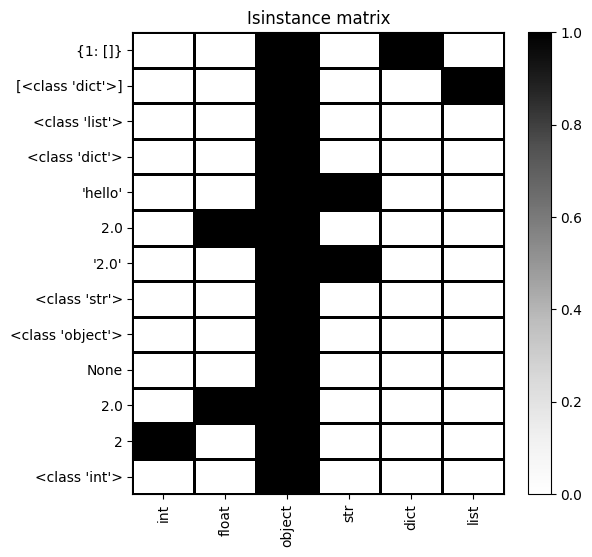

In [30]:
import numpy as np

list_of_objects = [
    int,
    2,
    2.,
    None,
    object,
    str,
    str(2.),
    float('2.0'),
    'hello',
    dict,
    list,
    [dict],
    {1: []}
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list
]

matrix = np.zeros((len(list_of_objects), len(list_of_types)), dtype=int)

for i, obj in enumerate(list_of_objects):
    for j, t in enumerate(list_of_types):
        if isinstance(obj, t):
            matrix[i, j] = 1

plt.figure(figsize=(6,6))
plt.pcolormesh(matrix, cmap='Greys', edgecolors='k', linewidth=1)
plt.xticks(np.arange(len(list_of_types)) + 0.5, [t.__name__ for t in list_of_types], rotation=90)
plt.yticks(np.arange(len(list_of_objects)) + 0.5, [repr(o) for o in list_of_objects])
plt.title("Isinstance matrix")
plt.colorbar()
plt.show()